You can also access the Jupyter Notebook via the following
Google Colab link:
https://colab.research.google.com/drive/1uJPiDI4AztZo6yWEQAmiBTR1JbdLrYBZ#scrollTo=VCgAxOerV3v

# Introduction



Of course, the important component of this for any business desiring to further optimize its marketing across multiple platforms would be the advertisement budgeting. Given how fast the area of digital advertising changes, it is crucial for a company to make right and data-driven decisions in budget allocation if maximum return for investment and meeting of business goals is to be attained.

In the project, we have developed an AI-driven solution that would automate the process of advertisement budget allocation using machine learning and data science techniques. It uses historical performance data from Google Ads, Meta Ads, Microsoft Ads, or other platforms to dynamically distribute the budget against key performance indicators for optimum results across channels. This is not only time-saving but also improves decision-making for better marketing efficiency and profitability.


#	Libraries and Versions

 Libraries Used:

%pip install pandas==1.3.3



%pip install scikit-learn==0.24.2

%pip install numpy==1.21.4

%pip install matplotlib==3.4.3

%pip install seaborn==0.11.1

%pip install flaml==0.8.0

%pip install dask[dataframe]==2024.7.1

In [68]:
!pip install flaml
!pip install dask[dataframe]
from flaml import AutoML
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [69]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Input Section

In [70]:
import pandas as pd
pd.set_option('display.max_columns', None)

Folder_path = '/content/drive/MyDrive/Netellixir/'
Dataset1 = 'Dataset1/'
Dataset2 = 'Dataset2/'

google_ads_filepath =  'googleads-performance.csv'
meta_ads_filepath = 'metaads-performance.csv'
microsoft_ads_filepath = 'microsoftads-performance.csv'
website_landings_filepath = 'website-landings.csv'

google_final_dfset1 = pd.read_csv(Folder_path + Dataset1 + google_ads_filepath)
microsoft_final_dfset1 = pd.read_csv(Folder_path + Dataset1 + microsoft_ads_filepath)
meta_final_dfset1 = pd.read_csv(Folder_path + Dataset1 + meta_ads_filepath   )
website_landings_dataset1 = pd.read_csv(Folder_path + Dataset1 +  website_landings_filepath)

google_final_dfset2 = pd.read_csv(Folder_path + Dataset2 + google_ads_filepath)
microsoft_final_dfset2 = pd.read_csv(Folder_path + Dataset2 + microsoft_ads_filepath)
meta_final_dfset2 = pd.read_csv(Folder_path + Dataset2 + meta_ads_filepath )
website_landings_dataset2 = pd.read_csv(Folder_path + Dataset2 + website_landings_filepath)

google_ads_df = pd.concat([google_final_dfset1, google_final_dfset2], ignore_index=True)
microsoft_ads_df = pd.concat([microsoft_final_dfset1, microsoft_final_dfset2], ignore_index=True)
meta_ads_df = pd.concat([meta_final_dfset1, meta_final_dfset2], ignore_index=True)
website_landings_df = pd.concat([website_landings_dataset1, website_landings_dataset2], ignore_index=True)

print("Google Ads:")
print(google_ads_df.head())

print("\nMicrosoft Ads:")
print(microsoft_ads_df.head())

print("\nMeta Ads:")
print(meta_ads_df.head())

print("\nWebsite Landings:")
print(website_landings_df.head())


Google Ads:
         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  

Microsoft Ads:
         Date     Campaign type  Impressions  Clicks   Cost  Conversions  \
0  2024-01-01          Audience       9132.0    50.0   26.8          0.0   
1  2024-01-01   Performance max        897.0     9.0    7.0          0.0   
2  2024-01-01  Search & content      95977.0   561.0  846.5          1.0   
3  2024-01-01          Shopping      59860.0   343.0  215.2          1.0   
4  2024-01-02          Audience       9926.0    49.0   25

In [126]:
# Total budget in dollars ($)
total_budget = 200000

# Approach and Methodology

## 1. Data Preprocessing

The trends highlighted by our EDA were:

* **Meta Cost-Effective Conversions:** Meta consistently delivers high conversions at a lower cost, making it an efficient channel.
* **Google Cross Network’s High Revenue, High Cost:** Google cross-network campaigns drive high revenues but come at a premium cost, indicating a large-scale reach.
* **Clicks vs. Conversions:** Broad-reach platforms like Google, Microsoft, and Meta excel in clicks, while Email and referral lead in conversion rates due to their intent-driven audiences.

To prepare the data for modeling, we applied several key preprocessing steps:

* **Missing Value Handling:**
  * Replaced numerical nulls with the median for robustness against outliers.
  * Filled categorical nulls with zeros for easier encoding.

* **Z-Score Normalization:**
  * Standardized features to prevent large values from skewing model learning.

* **Feature Engineering:**
  * Combined features, resulting in improved model performance with an R² score increase from ~0.85 to 0.94.

---

## 2. Algorithm

After testing several models we got the following results:

**Feature Preparation:**

- **X Variables:** Selected key features like impressions, clicks, cost, CTR, CPC, CPCV, CVR, and effective reach rate.
- **Target Variable:** Revenue was used as the target for prediction.

**Model Comparison Results:**

- **Linear Regression:**
  - **RMSE:** 0.754
  - **R² Score:** 0.503
- **Random Forest:**
  - **RMSE:** 0.266
  - **R² Score:** 0.938
- **AutoML(Best Model):**
  - **RMSE:** 0.247
  - **R² Score:** 0.946

 The LGBMRegressor outperformed other models, achieving a balance between prediction accuracy (R²) and error (RMSE).






We alloted the funds based on the following algorithm:

**Define Budget Parameters:**

- **Total Budget:** 70% of the available budget is allocated based on predicted revenue.
- **Minimum Allocation:** Ensure each platform receives at least 10% of the budget.

**Budget Allocation Calculation:**

- If predicted revenues are available (i.e., sum isn’t zero):
  - Allocate budget proportionally to predicted revenue, ensuring no platform gets less than 0.
- If predicted revenues are absent:
  - Set the allocation to 0.

**Adjust for Minimum Budget Requirement:**

- Group by platform and aggregate budget allocation and predicted revenue.
- Add the remaining 10% of the budget equally across all platforms.

**Return the Final Summary:**

- Output the adjusted budget allocations and predicted revenue by platform.


---

## 3. Assumptions


1. **Linear Relationships:**  
   - Linear regression assumes a linear relationship between features and the target (revenue). Even though the final model is non-linear (LGBM), the initial comparisons assume some degree of linearity.

2. **Distribution of Features:**  
   - The Z-score normalization assumes that features follow a roughly normal distribution, where outliers are handled appropriately by the scaling method.

3. **Budget Allocation Validity:**  
   - It’s assumed that dividing the budget based on predicted revenue is a valid approach and that proportional allocation aligns with business objectives.

4. **No External Shocks:**  
   - The model assumes there are no major external shocks (e.g., market disruptions, changes in consumer behavior) that could drastically alter campaign performance.

5. **Independence of Platforms:**  
   - The model assumes that each platform operates independently without significant interdependencies that could influence results (e.g., users responding differently across platforms).





### Data Preprocessing

In [71]:
def null_value_handling(df, platform):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Platform'] = platform
    df.fillna(0, inplace=True)
    return df

In [72]:
google_ads_df = null_value_handling(google_ads_df, 'Google Ads')
meta_ads_df = null_value_handling(meta_ads_df, 'Meta Ads')
microsoft_ads_df = null_value_handling(microsoft_ads_df, 'Microsoft Ads')

In [73]:
website_landings_df['Website Landing Time'] = pd.to_datetime(website_landings_df['Website Landing Time'], format='%Y-%m-%d %H:%M:%S')
website_landings_df['Is Converted'] = website_landings_df['Is Converted'].astype(int)

In [74]:
final_df = pd.concat([google_ads_df, meta_ads_df, microsoft_ads_df], axis=0)

###EDA & Feature Engineering




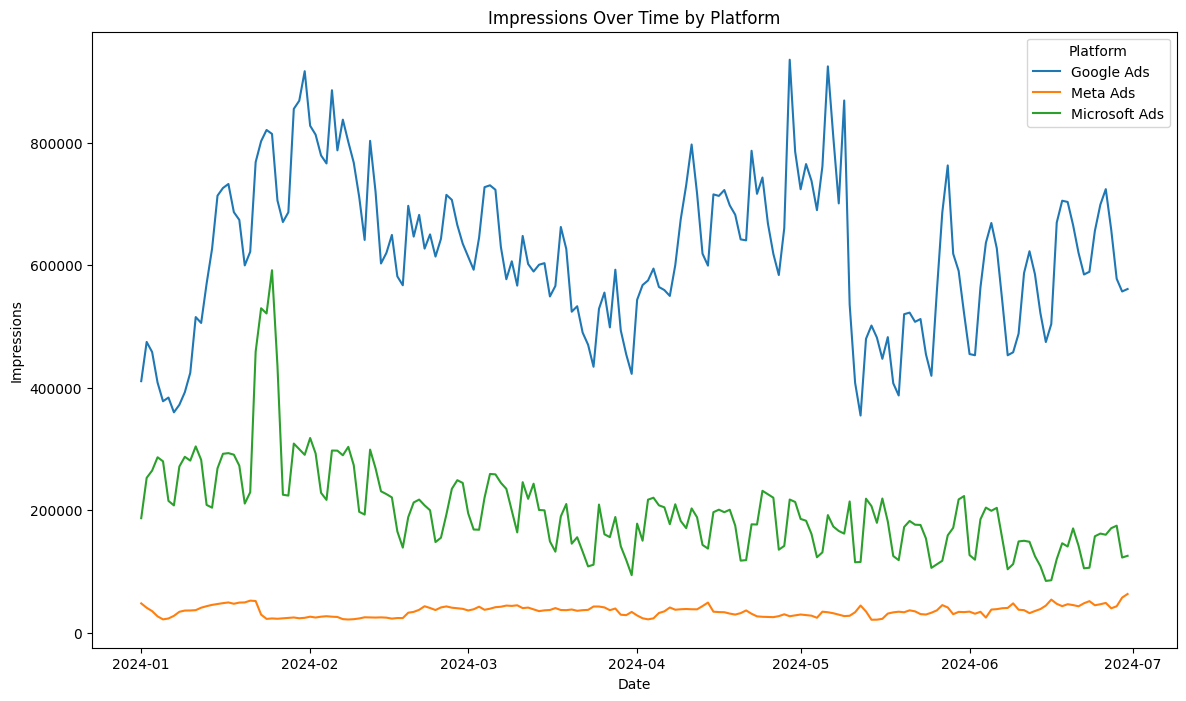

In [75]:
aggregated_df = final_df.groupby(['Date', 'Platform']).sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Date', y='Impressions', hue='Platform')
plt.title('Impressions Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.show()

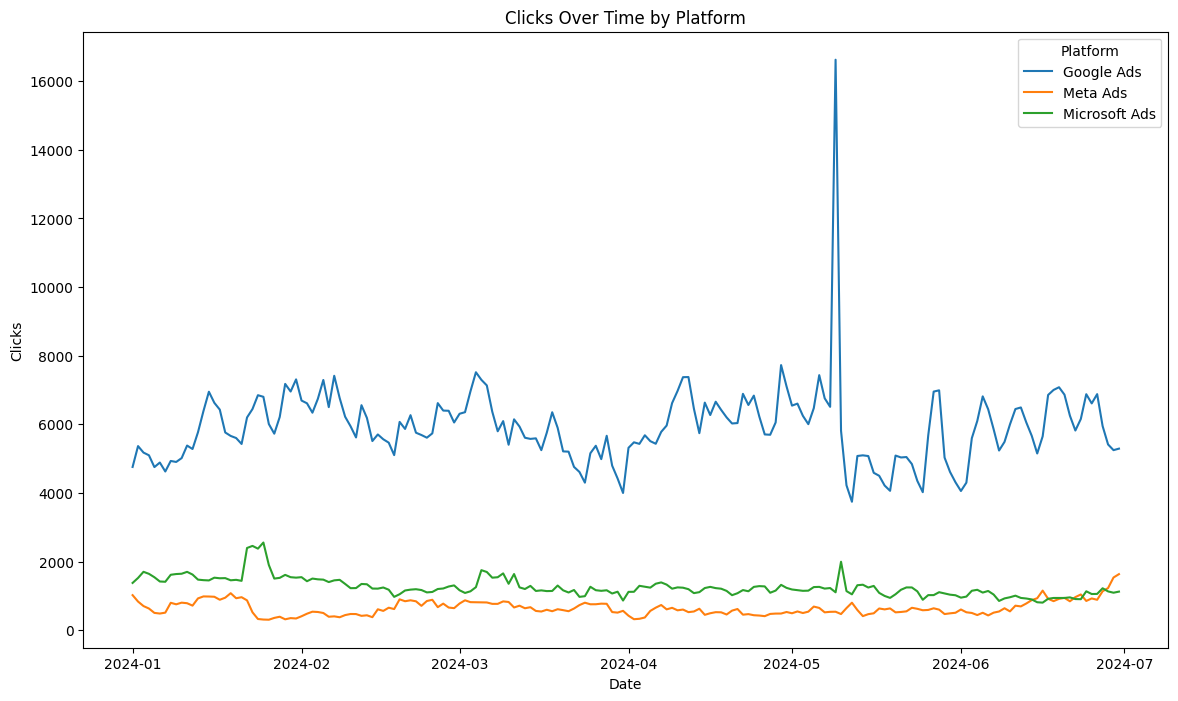

In [76]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Date', y='Clicks', hue='Platform')
plt.title('Clicks Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

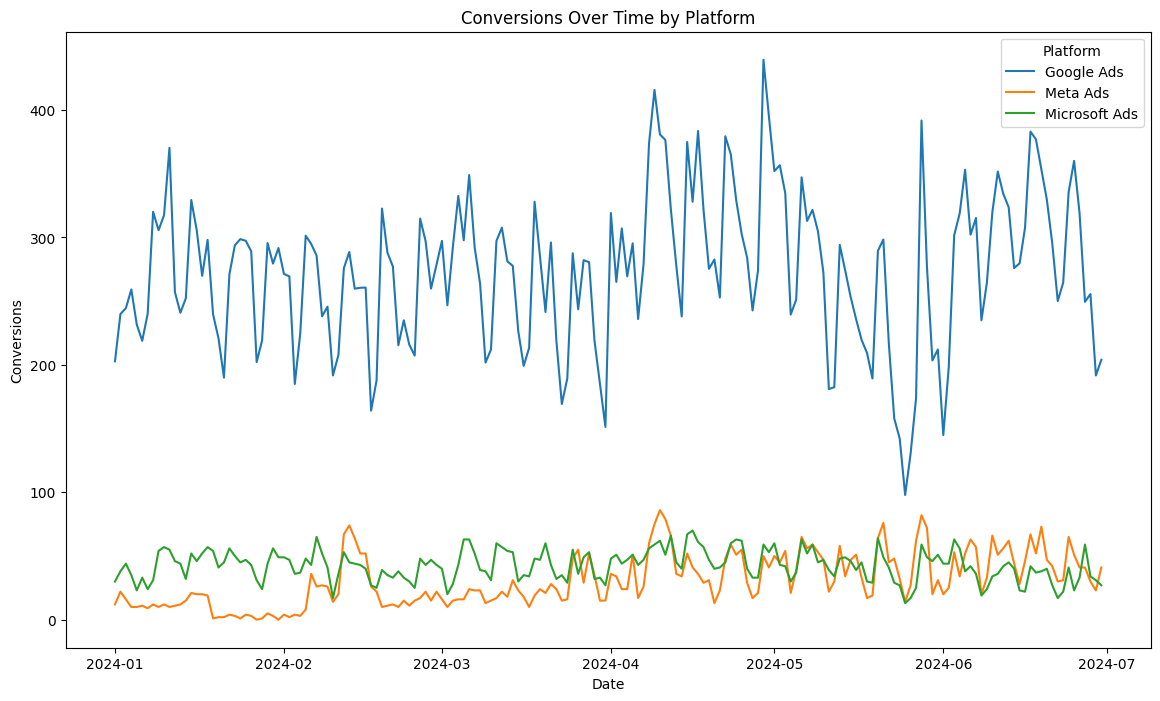

In [77]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Date', y='Conversions', hue='Platform')
plt.title('Conversions Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.show()

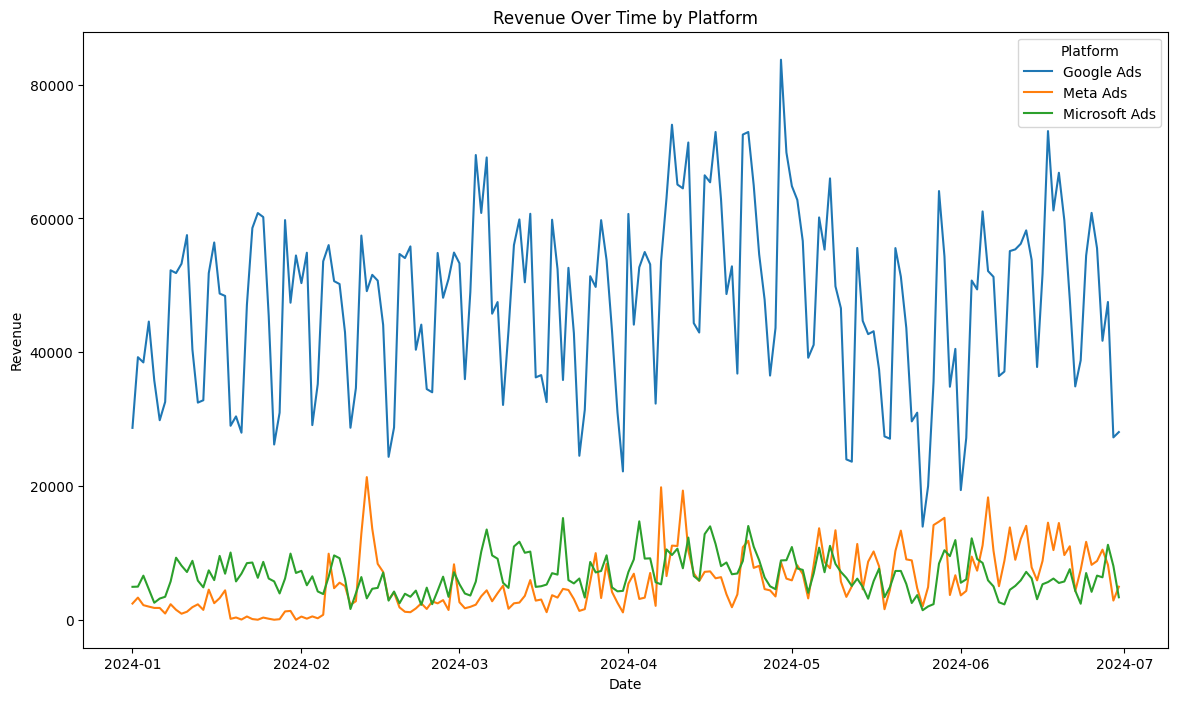

In [78]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Date', y='Revenue', hue='Platform')
plt.title('Revenue Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

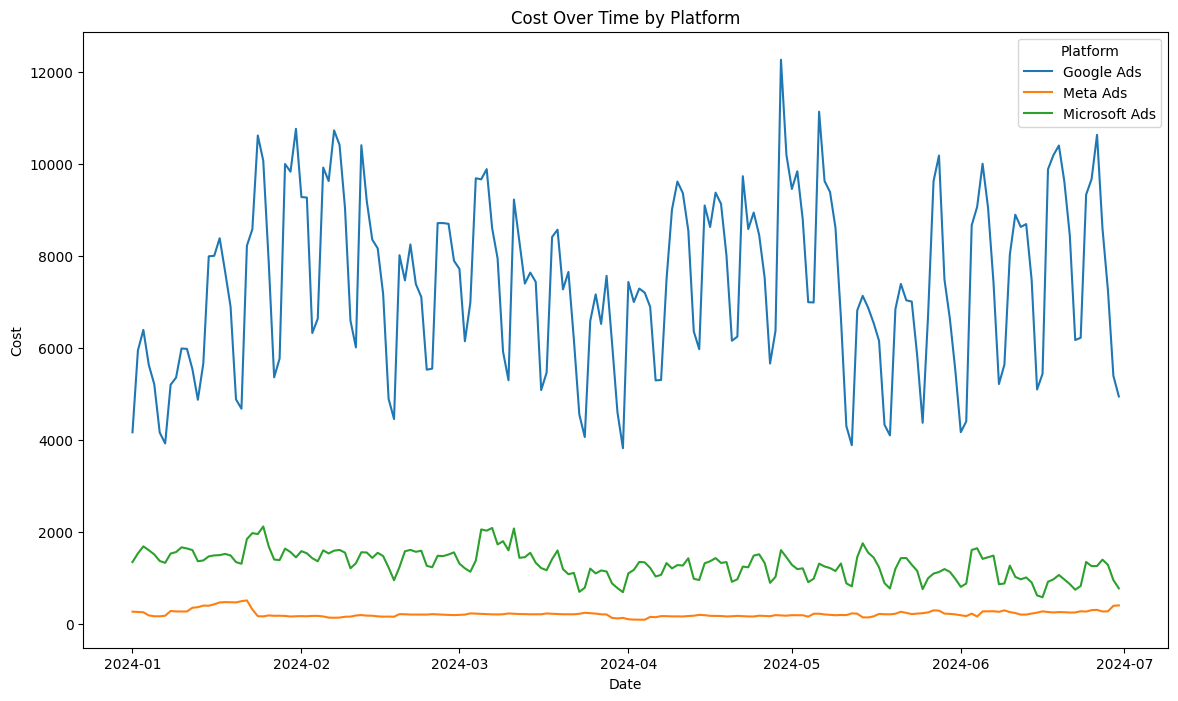

In [79]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=aggregated_df, x='Date', y='Cost', hue='Platform')
plt.title('Cost Over Time by Platform')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

In [80]:
cost_revenue_compare = final_df.groupby(['Date', 'Platform'])[['Cost', 'Revenue']].sum().reset_index()

cost_revenue_compare.head()

cost_revenue_compare['ROI'] = (cost_revenue_compare['Revenue'] - cost_revenue_compare['Cost']) / cost_revenue_compare['Cost']

cost_revenue_compare

,Date,Platform,Cost,Revenue,ROI
0,2024-01-01,Google Ads,4169.9,28683.9,5.878798
1,2024-01-01,Meta Ads,275.6,2416.5,7.768142
2,2024-01-01,Microsoft Ads,1353.1,4917.2,2.634026
3,2024-01-02,Google Ads,5946.5,39249.6,5.600454
4,2024-01-02,Meta Ads,269.2,3307.0,11.284547
...,...,...,...,...,...
541,2024-06-29,Meta Ads,402.0,2865.3,6.127612
542,2024-06-29,Microsoft Ads,960.8,8037.5,7.365425
543,2024-06-30,Google Ads,4948.0,28055.4,4.670049
544,2024-06-30,Meta Ads,412.5,4934.4,10.962182


In [81]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
print('check :' )
print(final_df.head())

check :
        Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0 2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1 2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2 2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3 2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4 2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue    Platform  Reach  
0   1410.3  Google Ads    NaN  
1      0.0  Google Ads    NaN  
2    576.4  Google Ads    NaN  
3      0.0  Google Ads    NaN  
4   3565.7  Google Ads    NaN  


In [82]:
time_series_df = final_df.drop(columns=['Platform','Campaign type']).groupby('Date').sum()

Text(0, 0.5, 'Clicks')

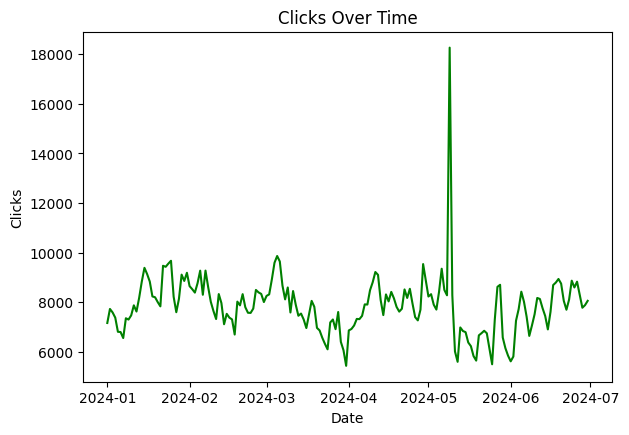

In [83]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
plt.plot(time_series_df.index, time_series_df['Clicks'], color='green')
plt.title('Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')

Text(0, 0.5, 'Conversions')

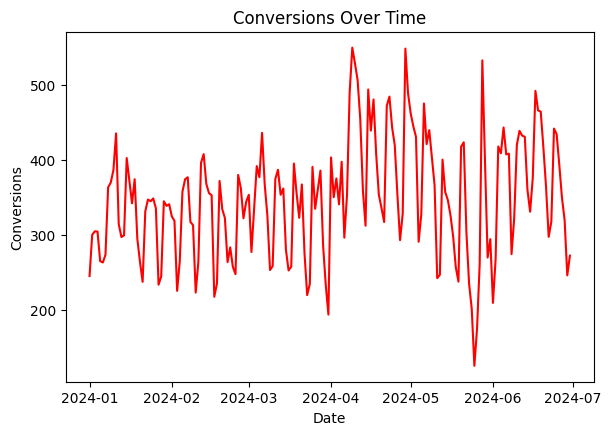

In [84]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
plt.plot(time_series_df.index, time_series_df['Conversions'], color='red')
plt.title('Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Conversions')


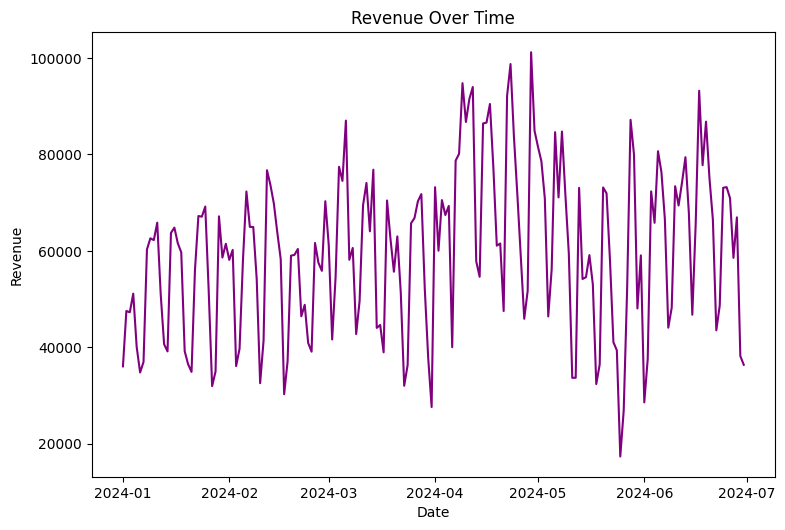

In [85]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
plt.plot(time_series_df.index, time_series_df['Revenue'], color='purple')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

In [86]:
final_df['CPC'] = final_df['Cost'] / (final_df['Clicks'])
final_df['CTR'] = (final_df['Clicks'] / (final_df['Impressions'])) * 100
final_df['CPCV'] = final_df['Cost'] / (final_df['Conversions'] )
final_df['CVR'] = (final_df['Conversions'] / final_df['Clicks']) * 100
final_df['Effective Reach Rate'] = (final_df['Reach'] / (final_df['Impressions'])) * 100

campaign_cost_revenue_compare = final_df.groupby(['Platform', 'Campaign type', 'Date'])[['Cost', 'Revenue']].sum().reset_index()

campaign_cost_revenue_compare.head()

,Platform,Campaign type,Date,Cost,Revenue
0,Google Ads,Cross-network,2024-01-01,2613.7,19245.8
1,Google Ads,Cross-network,2024-01-02,3580.9,23205.2
2,Google Ads,Cross-network,2024-01-03,3550.8,24182.9
3,Google Ads,Cross-network,2024-01-04,3176.2,27999.4
4,Google Ads,Cross-network,2024-01-05,2950.6,20000.4


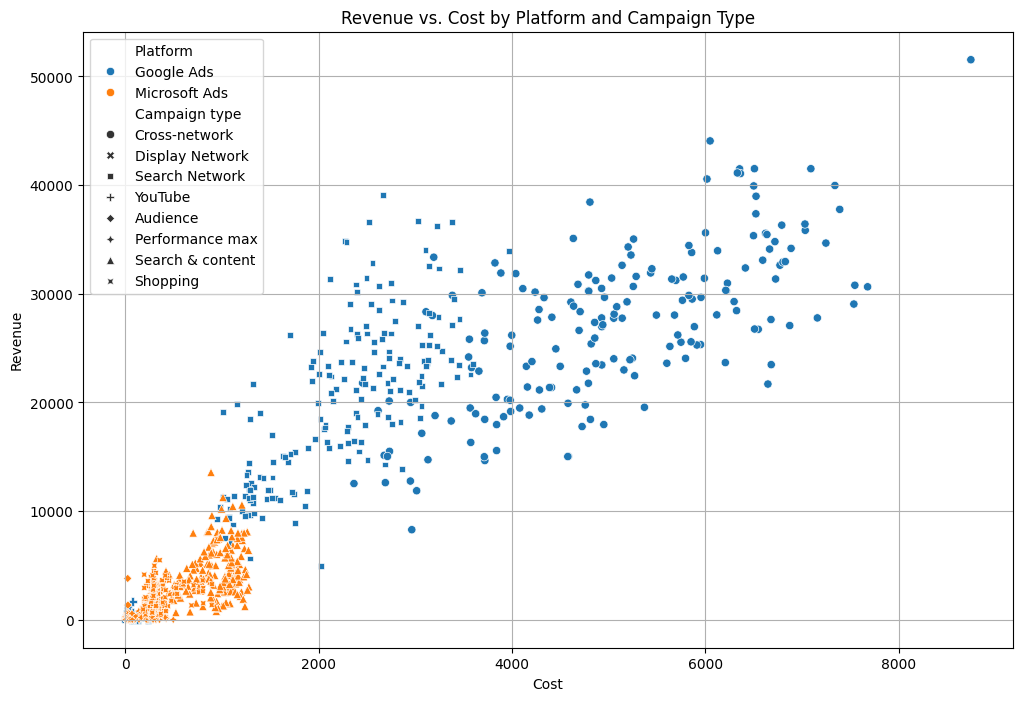

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [87]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=campaign_cost_revenue_compare, x='Cost', y='Revenue', hue='Platform', style='Campaign type')
plt.title('Revenue vs. Cost by Platform and Campaign Type')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))

Text(0, 0.5, 'Cost')

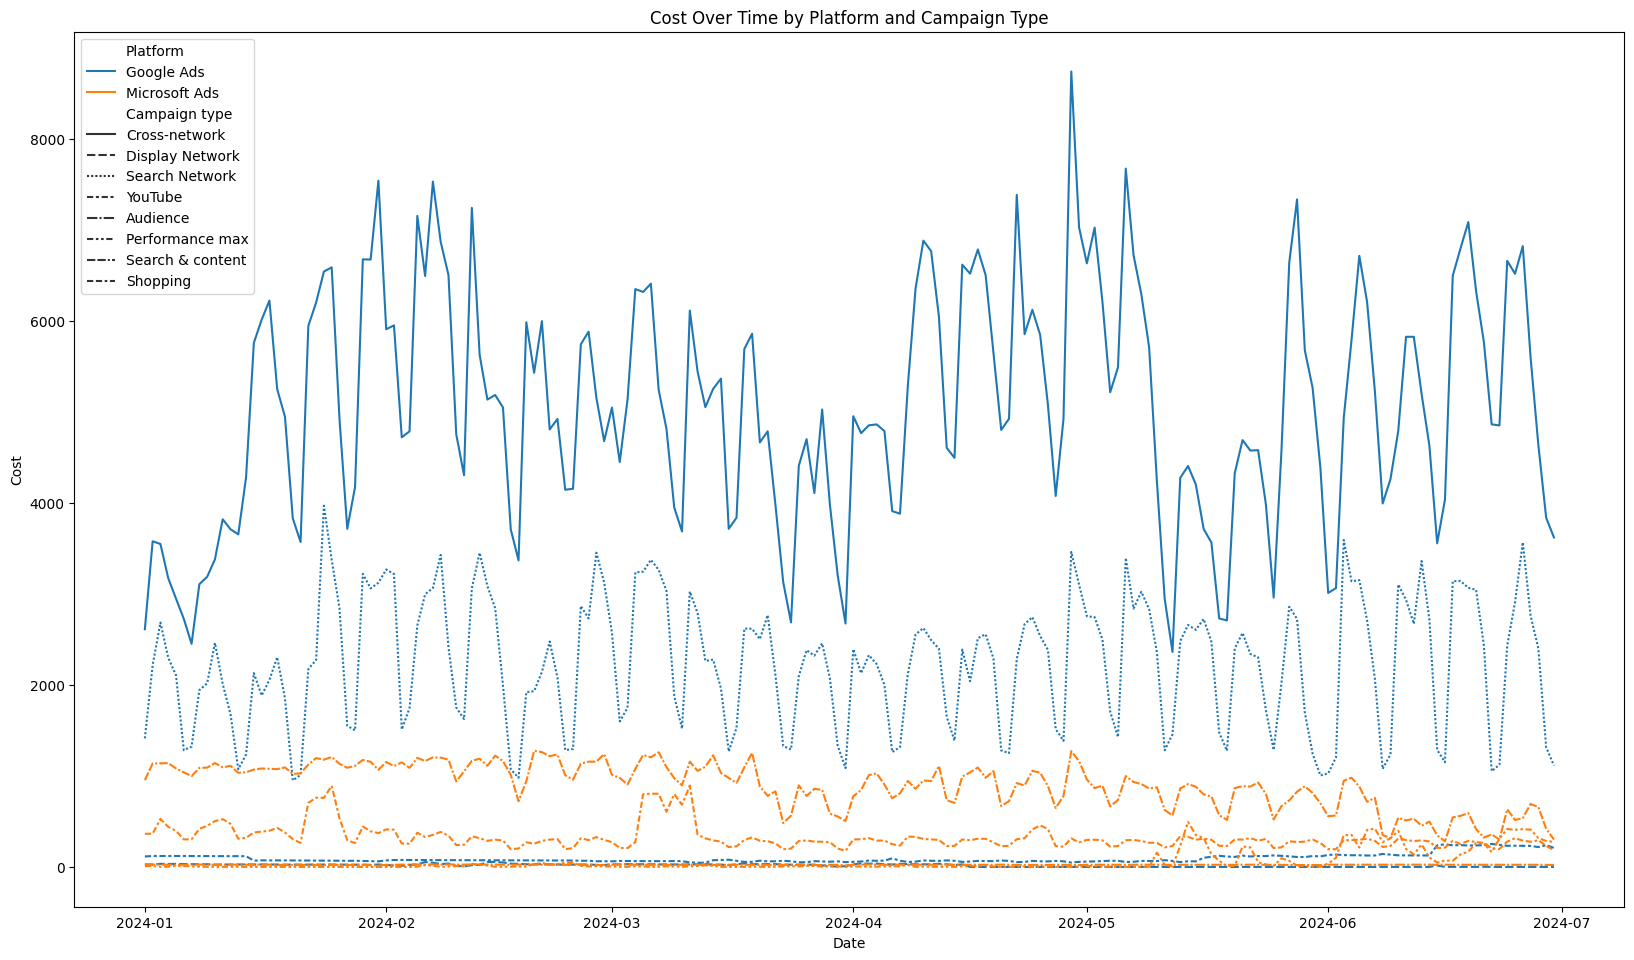

In [88]:
plt.figure(figsize=(20, 25))
plt.subplot(2, 1, 1)
sns.lineplot(data=campaign_cost_revenue_compare, x='Date', y='Cost', hue='Platform', style='Campaign type')
plt.title('Cost Over Time by Platform and Campaign Type')
plt.xlabel('Date')
plt.ylabel('Cost')


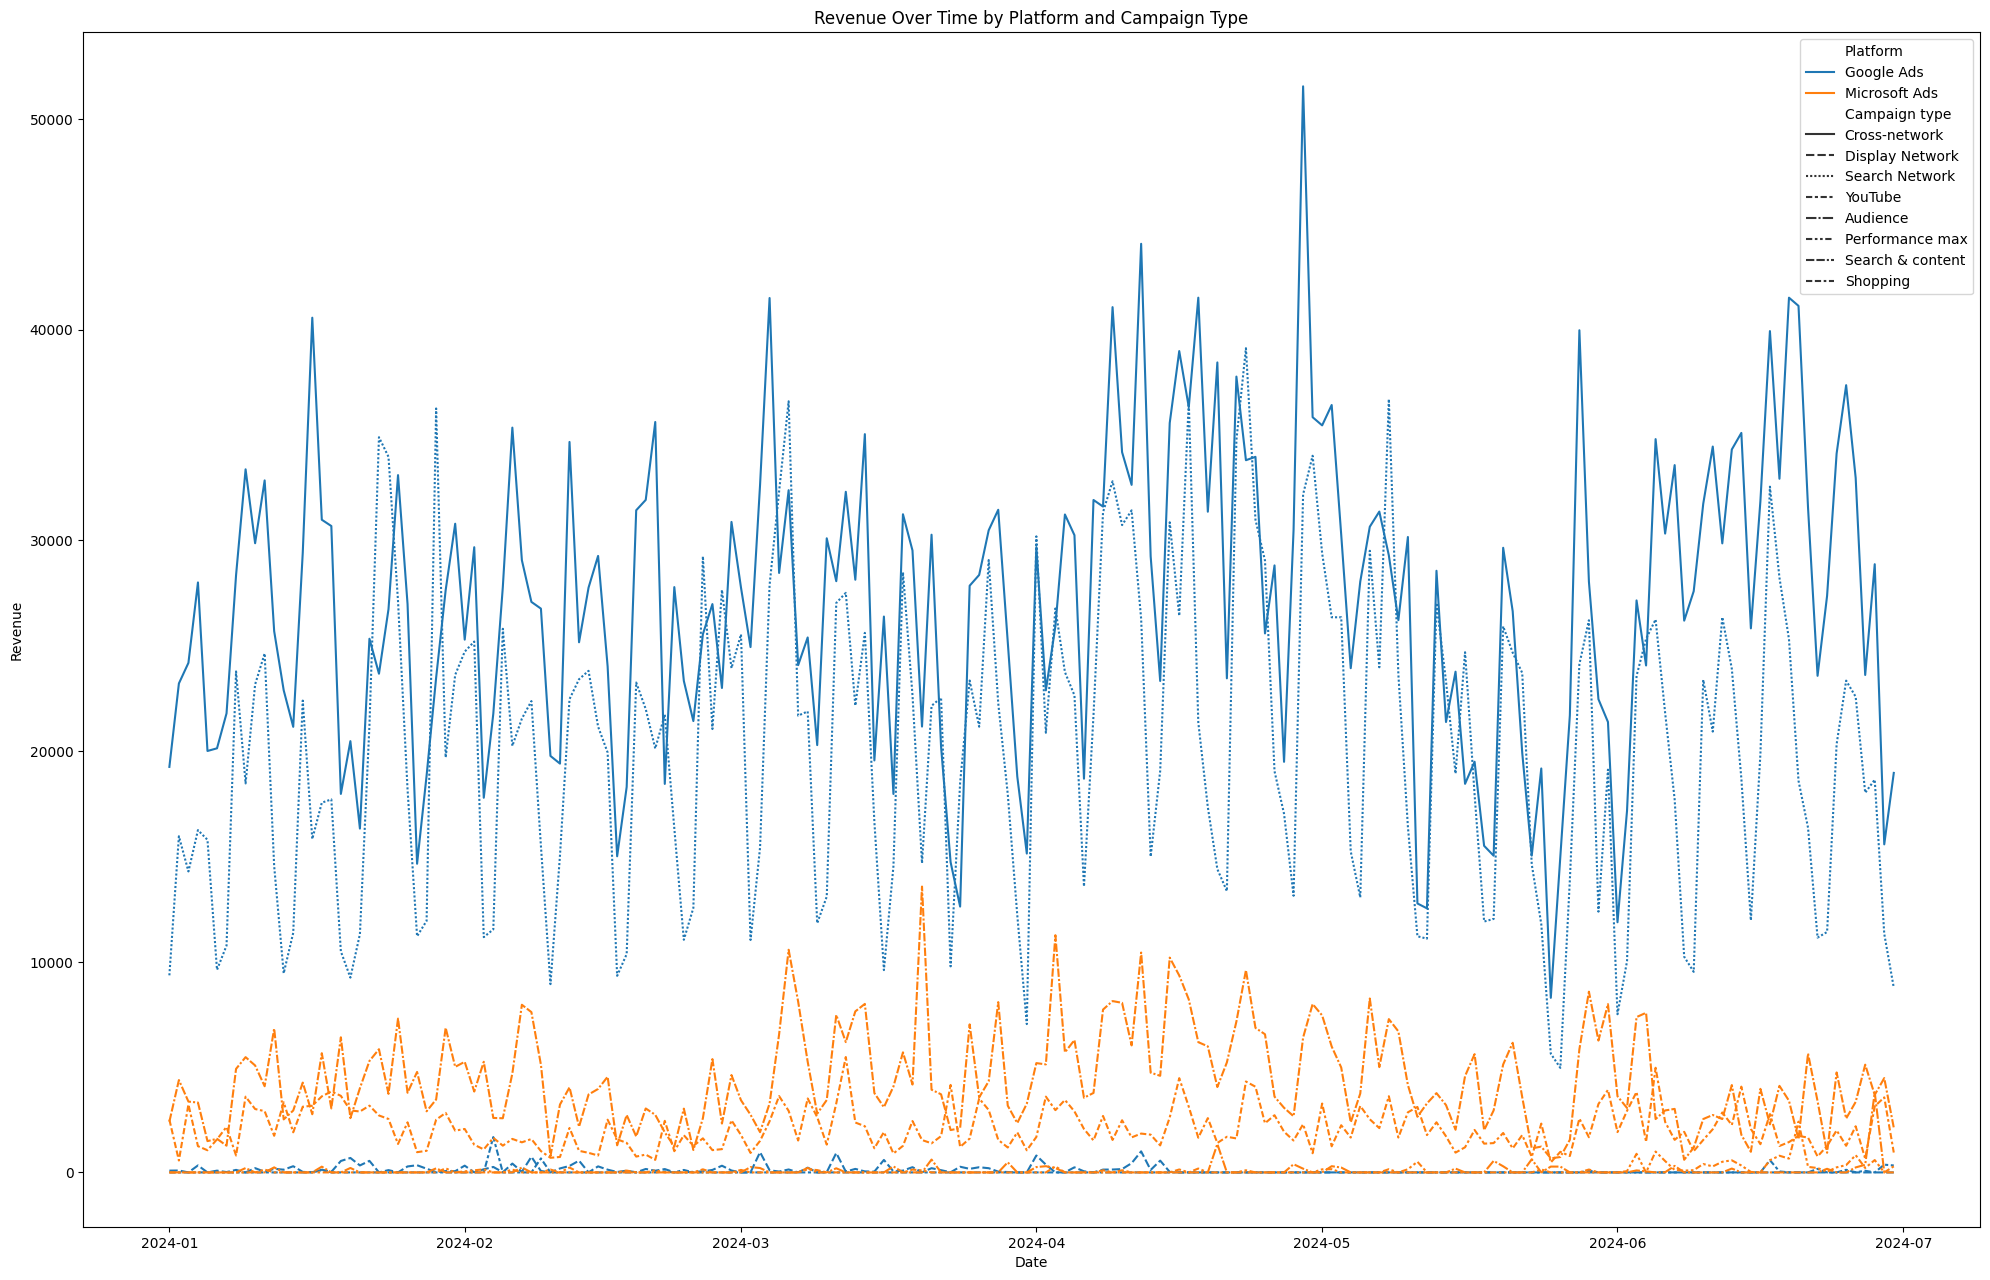

In [89]:
plt.figure(figsize=(20, 25))
plt.subplot(2, 1, 2)
sns.lineplot(data=campaign_cost_revenue_compare, x='Date', y='Revenue', hue='Platform', style='Campaign type')
plt.title('Revenue Over Time by Platform and Campaign Type')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


In [90]:
total_users = website_landings_df.shape[0]
total_converted = website_landings_df['Is Converted'].sum()
conversion_rate = (total_converted / total_users) * 100

print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

source_channel_conversion = website_landings_df.groupby(['Source', 'Channel'])['Is Converted'].mean() * 100

print("Conversion Rate by Source and Channel:")
print(source_channel_conversion)


Overall Conversion Rate: 2.00%
Conversion Rate by Source and Channel:
Source         Channel       
amazon         organic search    0.000000
aol            organic search    4.838710
               paid search       6.666667
aol mail       email             0.000000
atlas          organic search    0.000000
                                   ...   
yahoo! images  organic search    0.000000
yahoo! mail    email             5.333333
yandex         organic search    0.000000
youtube        social            0.640757
zoho           email             0.000000
Name: Is Converted, Length: 69, dtype: float64


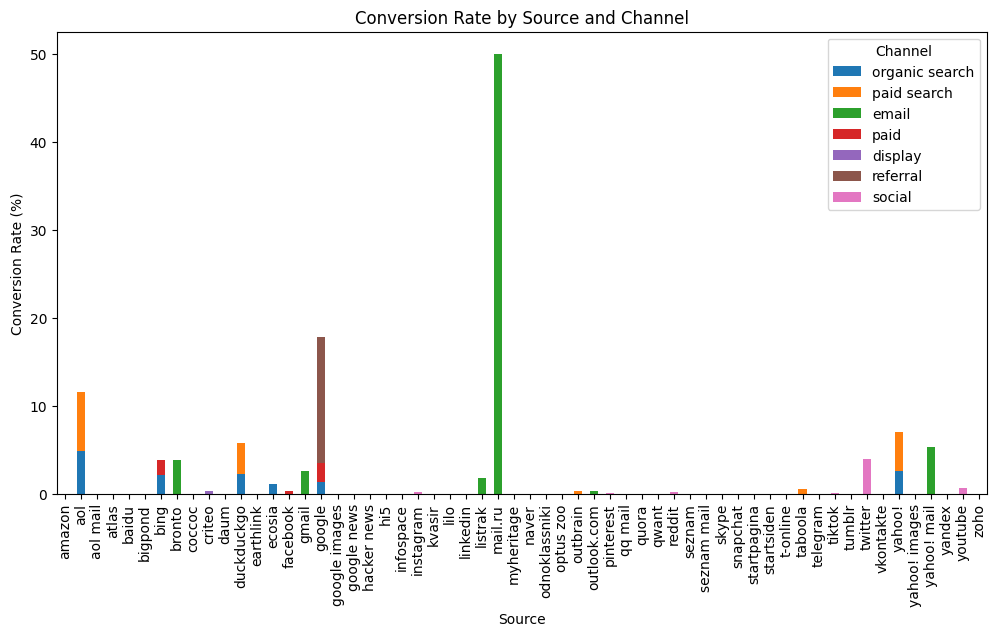

In [91]:
source_channel_conversion.unstack().plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Conversion Rate by Source and Channel')
plt.xlabel('Source')
plt.ylabel('Conversion Rate (%)')
plt.show()


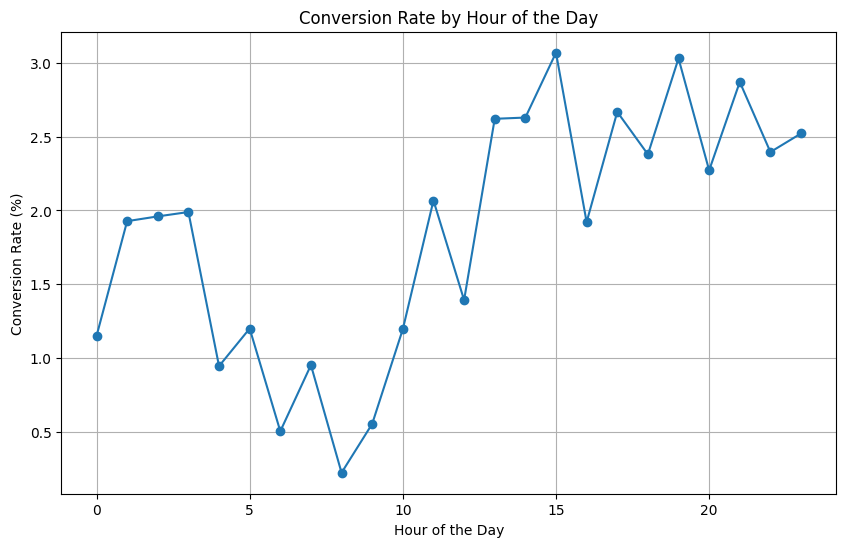

In [92]:
website_landings_df['Website Landing Time'] = pd.to_datetime(website_landings_df['Website Landing Time'])

website_landings_df['Hour'] = website_landings_df['Website Landing Time'].dt.hour
website_landings_df['Day of Week'] = website_landings_df['Website Landing Time'].dt.day_name()

hourly_conversion = website_landings_df.groupby('Hour')['Is Converted'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(hourly_conversion.index, hourly_conversion, marker='o', linestyle='-')
plt.title('Conversion Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()


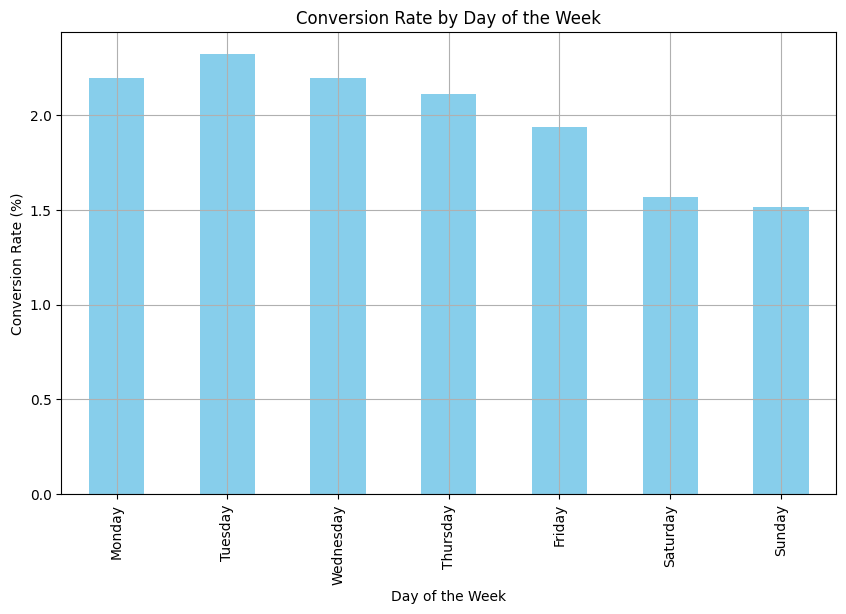

In [93]:
daily_conversion = website_landings_df.groupby('Day of Week')['Is Converted'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) * 100

plt.figure(figsize=(10, 6))
daily_conversion.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

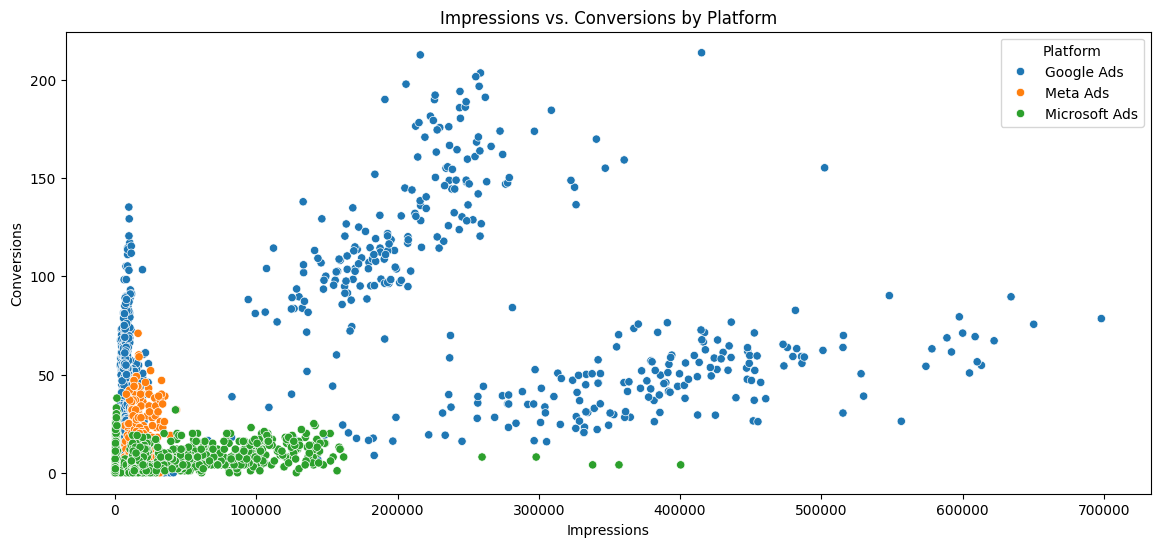

In [94]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=final_df, x='Impressions', y='Conversions', hue='Platform')
plt.title('Impressions vs. Conversions by Platform')
plt.show()

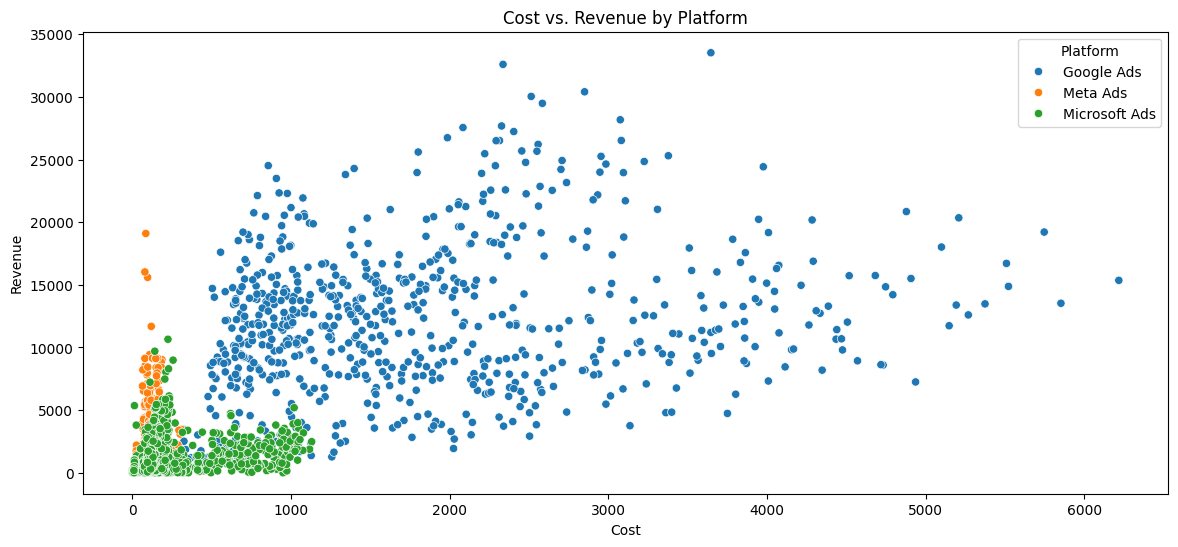

In [95]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=final_df, x='Cost', y='Revenue', hue='Platform')
plt.title('Cost vs. Revenue by Platform')
plt.show()

In [96]:
df = pd.get_dummies(final_df, columns=['Campaign type', 'Platform'])

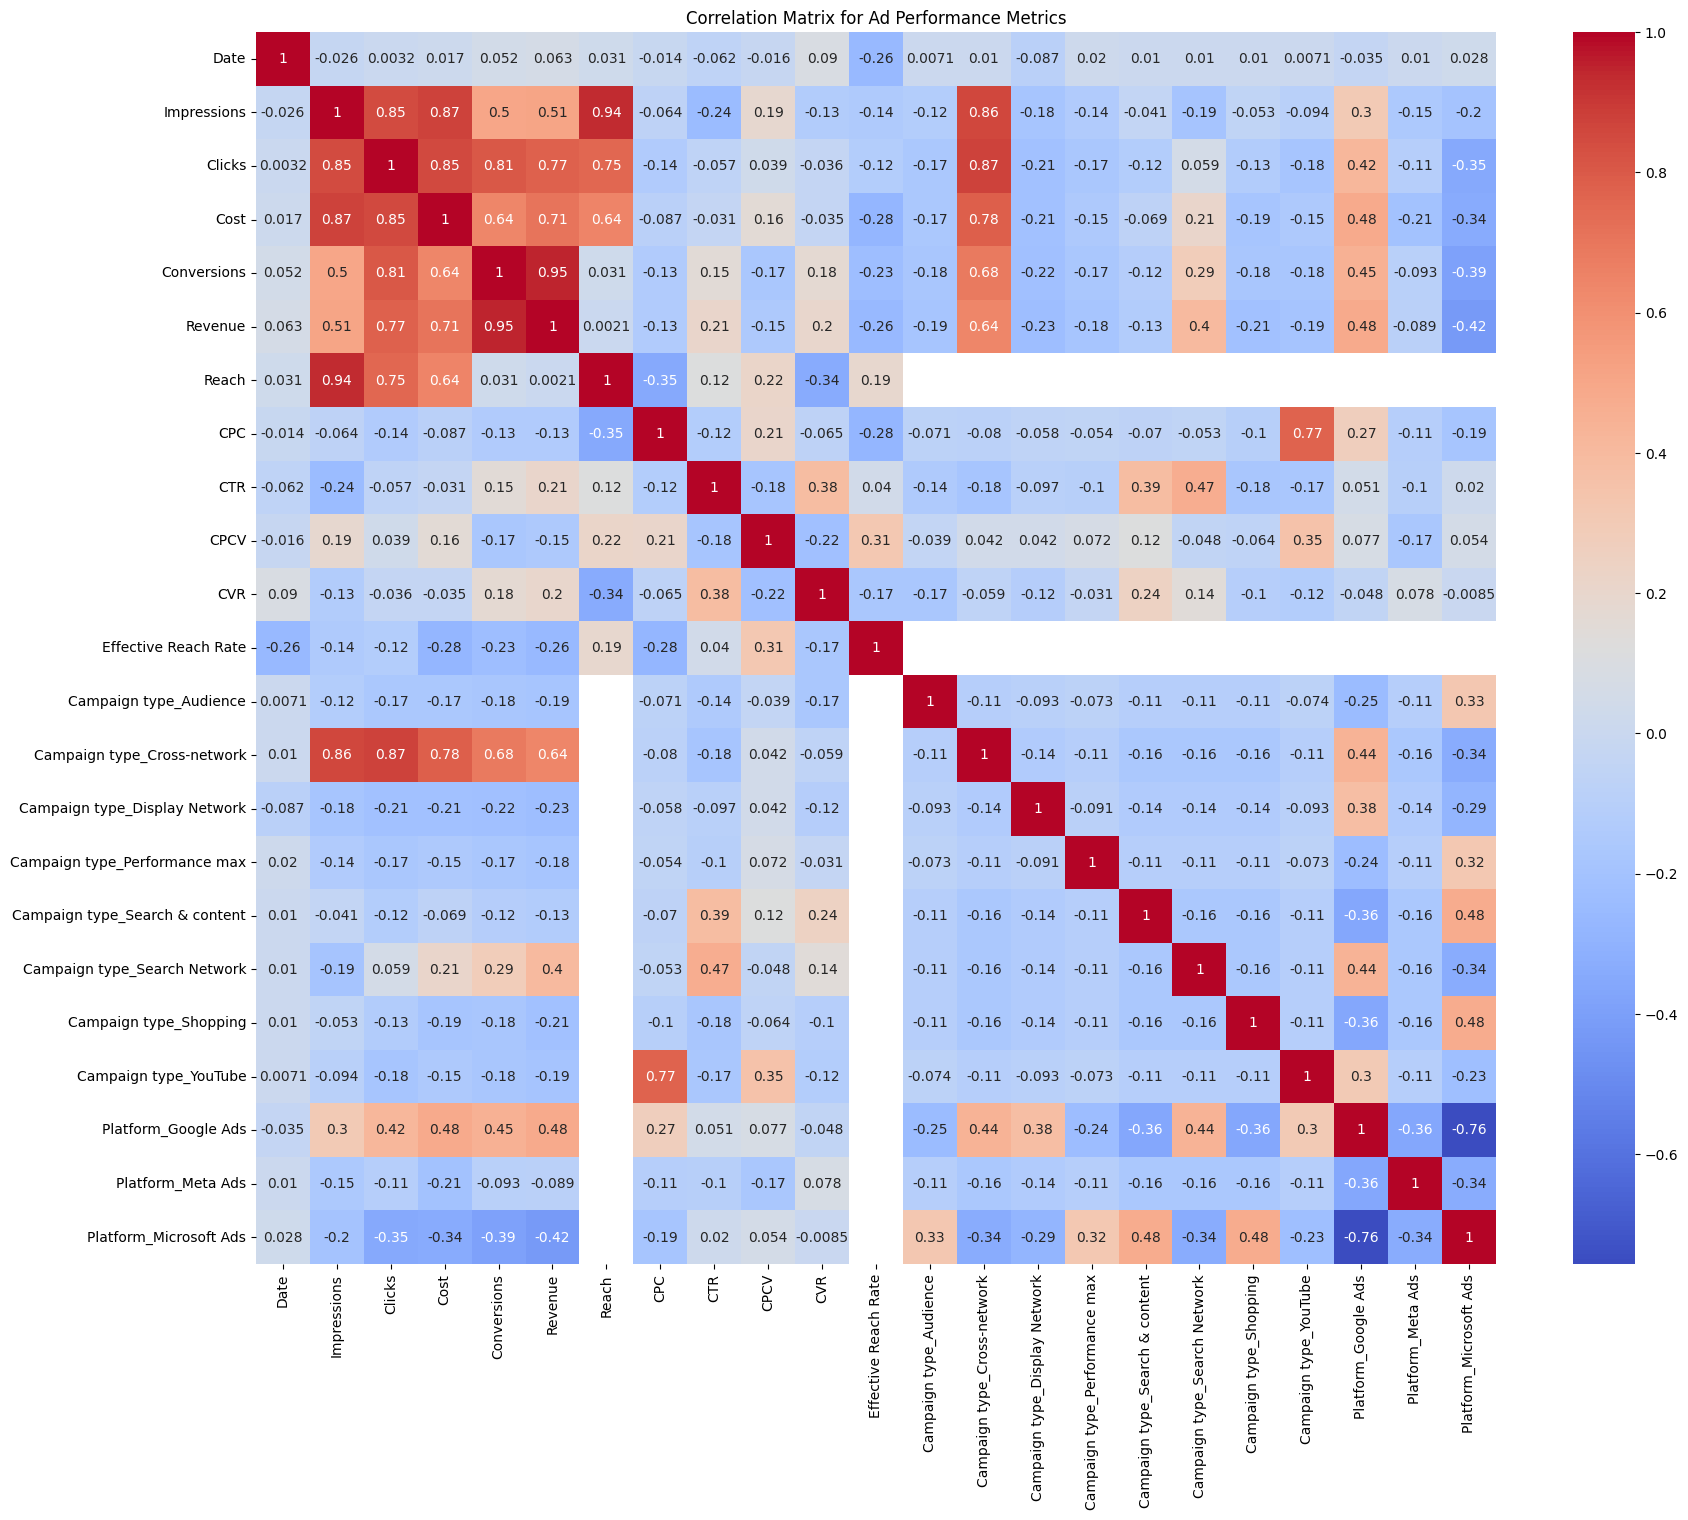

In [97]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Ad Performance Metrics')
plt.show()

####  Aggregating Data





In [98]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.fillna(0, inplace=True)

In [99]:
performance_summary = final_df.groupby(['Platform', 'Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

In [100]:
print(performance_summary)

        Platform     Campaign type  Impressions    Clicks      Cost  \
0     Google Ads     Cross-network  105764384.0  827215.0  921009.4   
1     Google Ads   Display Network     363182.0   11890.0    3009.3   
2     Google Ads    Search Network    2945690.0  240351.0  407779.5   
3     Google Ads           YouTube    3966995.0    1002.0   17191.6   
4       Meta Ads                 0    6358130.0  118486.0   41509.3   
5  Microsoft Ads          Audience    2078054.0   10966.0    4383.8   
6  Microsoft Ads   Performance max     631902.0    6972.0   10921.5   
7  Microsoft Ads  Search & content   17515017.0  110018.0  164133.6   
8  Microsoft Ads          Shopping   16294351.0  101891.0   59282.0   

   Conversions    Revenue  
0      31385.2  4941392.7  
1        108.1    18460.4  
2      18184.6  3678223.9  
3         14.3     4408.1  
4       5635.0  1026382.3  
5         55.0    14205.1  
6        120.0    16551.1  
7       4813.0   809692.2  
8       2758.0   375778.2  


In [101]:
scaler = StandardScaler()
X = scaler.fit_transform(performance_summary[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

#### Apply KMeans Clustering

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
performance_summary['Cluster'] = kmeans.fit_predict(X)

In [103]:
performance_summary['Cluster'].describe()

,Cluster
count,9.000000
mean,0.333333
std,0.707107
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


Unique clusters: [1 0 2]


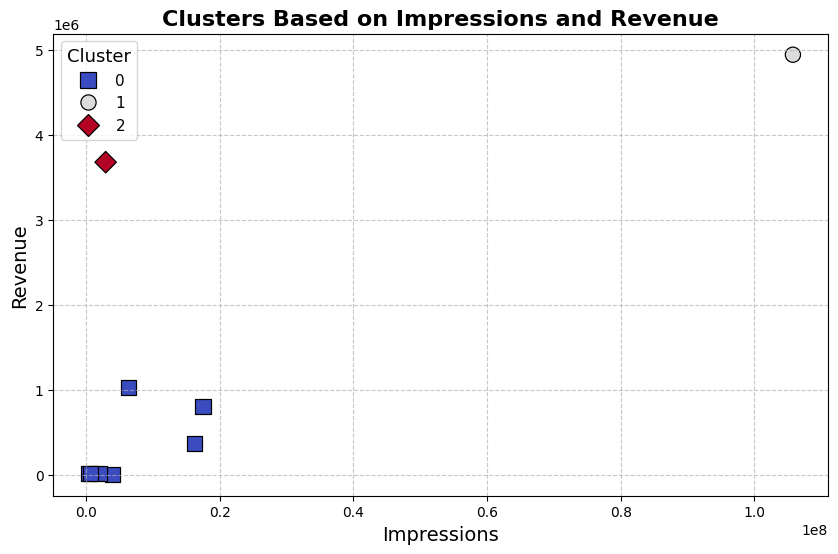

In [104]:
unique_clusters = performance_summary['Cluster'].unique()
print("Unique clusters:", unique_clusters)

markers_dict = {cluster: marker for cluster, marker in zip(unique_clusters, ['o', 's', 'D'])}

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=performance_summary,
    x='Impressions',
    y='Revenue',
    hue='Cluster',
    palette='coolwarm',
    style='Cluster',
    markers=markers_dict,
    s=120,
    edgecolor='black',
    legend='full',
    ax=ax
)

ax.set_title('Clusters Based on Impressions and Revenue', fontsize=16, fontweight='bold')
ax.set_xlabel('Impressions', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

ax.legend(title='Cluster', title_fontsize='13', fontsize='11')

plt.show()

In [105]:
final_df.columns

Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue', 'Platform', 'Reach', 'CPC', 'CTR', 'CPCV', 'CVR',
       'Effective Reach Rate'],
      dtype='object')

# 	Algorithm Implementation

### Preparing variables for modelling

In [106]:
X = final_df[['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC', 'CPCV', 'CVR', 'Effective Reach Rate']]
y = final_df['Revenue']


## Models

#### Standardize Data

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X[['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC', 'CPCV', 'CVR', 'Effective Reach Rate']])
y_mean = y.mean()
y_std = y.std()
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Linear Regression - R2 Score:", r2_score(y_test, lr_predictions))

Linear Regression - RMSE: 0.754768603550747
Linear Regression - R2 Score: 0.5035369495399262


In [109]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest - R2 Score:", r2_score(y_test, rf_predictions))

Random Forest - RMSE: 0.26587986375646416
Random Forest - R2 Score: 0.9383929839867038


In [110]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
automl = AutoML()
automl.fit(X_train, y_train.to_numpy(), task="regression", time_budget=60, seed=10)
y_pred = automl.predict(X_test)


[flaml.automl.logger: 08-25 17:18:37] {1680} INFO - task = regression
[flaml.automl.logger: 08-25 17:18:37] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 08-25 17:18:37] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 08-25 17:18:37] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-25 17:18:37] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-25 17:18:37] {2345} INFO - Estimated sufficient time budget=1231s. Estimated necessary time budget=9s.
[flaml.automl.logger: 08-25 17:18:37] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.5772,	best estimator lgbm's best error=0.5772
[flaml.automl.logger: 08-25 17:18:37] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-25 17:18:37] {2392} INFO -  at 0.5s,	estimator lgbm's best error=0.5772,	best estimator lgbm's best error=0.5772
[flaml.automl.logger: 08-25 17:18:37] {2219} INFO - i

In [111]:
print('The best model is : ' + str(automl.model.estimator))
print("It's RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("It's R2 Score:", r2_score(y_test, y_pred))
pred_revenue = automl.predict(X)

The best model is : ExtraTreesRegressor(max_features=0.9488953144675591, max_leaf_nodes=180,
                    n_estimators=191, n_jobs=-1, random_state=12032022)
It's RMSE: 0.2470358675443068
It's R2 Score: 0.9468162071366457


In [112]:
pred_revenue = pred_revenue * y_std + y_mean
final_df['Predicted Revenue'] = pred_revenue
final_df

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Platform,Reach,CPC,CTR,CPCV,CVR,Effective Reach Rate,Predicted Revenue
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3,Google Ads,0.0,0.732478,0.623656,100.969231,0.725446,0.0,1308.675522
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0,Google Ads,0.0,0.000000,0.000000,0.000000,0.000000,0.0,60.324778
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4,Google Ads,0.0,1.978088,6.781951,110.333333,1.792829,0.0,1251.697563
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0,Google Ads,0.0,14.400000,0.022093,0.000000,0.000000,0.0,83.683814
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7,Google Ads,0.0,1.301195,0.638706,173.295455,0.750853,0.0,2468.291210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2024-06-28,Shopping,15266.0,229.0,129.9,8.0,2522.0,Microsoft Ads,0.0,0.567249,1.500066,16.237500,3.493450,0.0,1203.365440
1081,2024-06-29,Search & content,365.0,87.0,133.7,15.0,4178.8,Microsoft Ads,0.0,1.536782,23.835616,8.913333,17.241379,0.0,1984.894799
1082,2024-06-29,Shopping,14916.0,247.0,129.4,10.0,1239.9,Microsoft Ads,0.0,0.523887,1.655940,12.940000,4.048583,0.0,1332.440632
1083,2024-06-30,Search & content,303.0,69.0,99.2,11.0,1721.7,Microsoft Ads,0.0,1.437681,22.772277,9.018182,15.942029,0.0,1850.466111


## Budget Allocation

In [113]:
def allocate_budget(df, total_budget):
    tot = 0.7 * total_budget
    if df['Predicted Revenue'].sum() != 0:
        df['Budget Allocation'] = np.maximum(df['Predicted Revenue'] / df['Predicted Revenue'].sum(), 0) * tot
    else:
        df['Budget Allocation'] = 0
    budget_summary = df.groupby(['Platform']).agg({
    'Budget Allocation': 'sum',
    'Predicted Revenue': 'sum'
    }).reset_index()
    budget_summary['Budget Allocation'] += (0.1 * total_budget)
    budget_summary
    return budget_summary


# Results

In [129]:
min_budget_per_channel = 0.1 * total_budget

In [128]:
budget_summary = allocate_budget(final_df, total_budget)

In [123]:
print(budget_summary)
print('Total Budget($):')
budget_summary['Budget Allocation'] = budget_summary['Budget Allocation'].astype(int)
print(budget_summary['Budget Allocation'].sum())

        Platform  Budget Allocation  Predicted Revenue
0     Google Ads             131015       8.653551e+06
1       Meta Ads              33097       1.020901e+06
2  Microsoft Ads              35887       1.238392e+06
Total Budget($):
199999


#### Visualizations

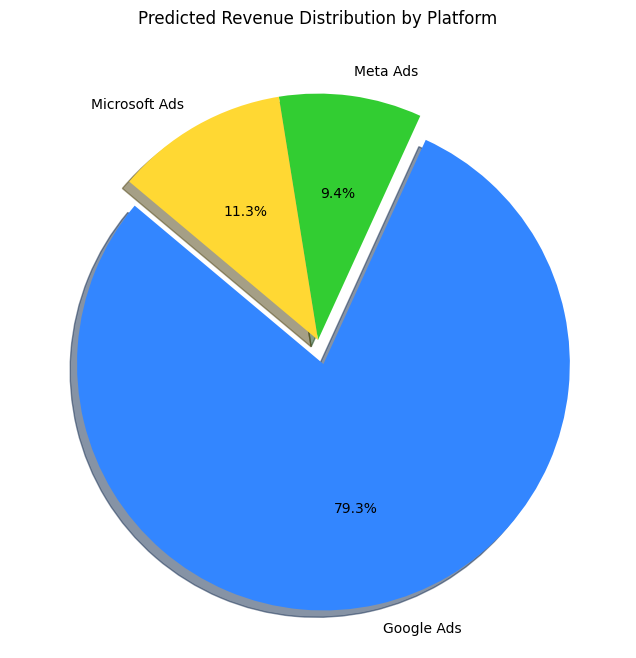

In [118]:
platforms = budget_summary['Platform']
predicted_revenues = budget_summary['Predicted Revenue']

plt.figure(figsize=(8, 8))
plt.pie(predicted_revenues, labels=platforms, autopct='%1.1f%%', startangle=140,
        explode=(0.1, 0, 0), colors=['#3386ff', '#32CD32', '#ffd833'], shadow=True)

plt.title('Predicted Revenue Distribution by Platform')
plt.show()



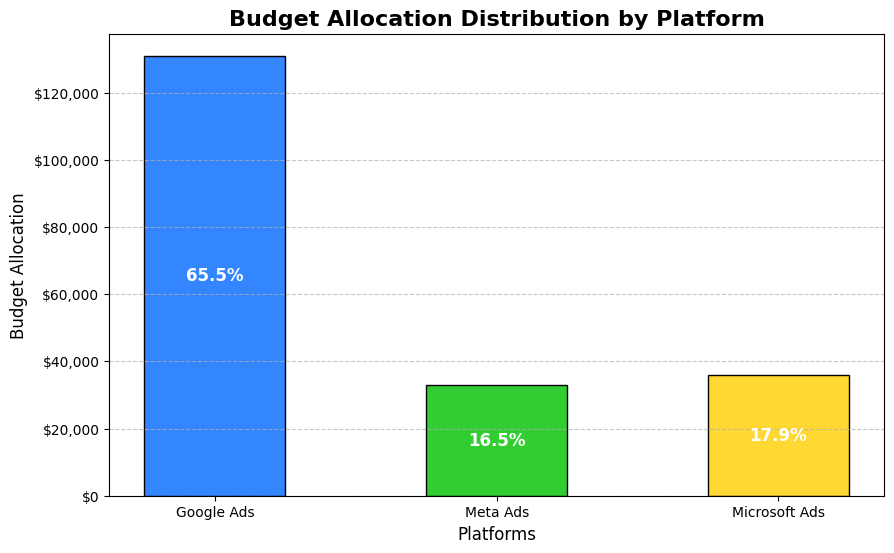

In [119]:
platforms = budget_summary['Platform']
predicted_revenues = budget_summary['Budget Allocation']

total_revenue = sum(predicted_revenues)
percentages = [(revenue / total_revenue) * 100 for revenue in predicted_revenues]

def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
bars = plt.bar(platforms, predicted_revenues, width=0.5, color=['#3386ff', '#32CD32', '#ffd833'], edgecolor='black')

plt.title('Budget Allocation Distribution by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platforms', fontsize=12)
plt.ylabel('Budget Allocation', fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

for bar, percentage in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{percentage:.1f}%',
        ha='center', va='center', fontsize=12, color='white', fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Conclusion


Based on this analysis, more budget should be allocated to Google Ads. This is because, compared to other advertising channels, Google Ads has much greater potential to scale and generate profits. Increased investment in Google Ads is expected to yield a better Return on Advertising Spend (ROAS) and ultimately improve campaign performance.

###  Future Work

If provided with further opportunities, the following ideas would be pursued:

1. **Factor in Real-Time Market Conditions and Other Supplemental Data**:
   - Enhance prediction accuracy by incorporating real-time market conditions and additional data sources. This includes tracking economic indicators, industry trends, and competitors. Such factors will enable more informed and adaptive budget allocation decisions.

2. **Implement Real-Time Data Processing**:
   - Design a system to process current affairs and live data. This approach will allow for dynamic adjustments in budget allocations based on real-time performance metrics and evolving market conditions, ensuring that the budget adapts promptly to changes.

3. **Build a System for Receiving User Feedback**:
   - Develop a channel for stakeholders and users to provide feedback on the model. This feedback will be used to refine the model, address practical challenges, and make iterative improvements, resulting in a more effective and user-friendly budget allocation strategy.


We tried some external datasets to predict the number of searches in given month. However we coun't find enough relevent data to use it in our model.We tried this external dataset , but this was too small & we got terrible result.
## This is not a part of our best work model



   Timestamp  TrafficCount
0 2020-01-20       95746.0
1 2020-01-21      267521.0
2 2020-01-22      452541.0
3 2020-01-23      429927.0
4 2020-01-24      239579.0


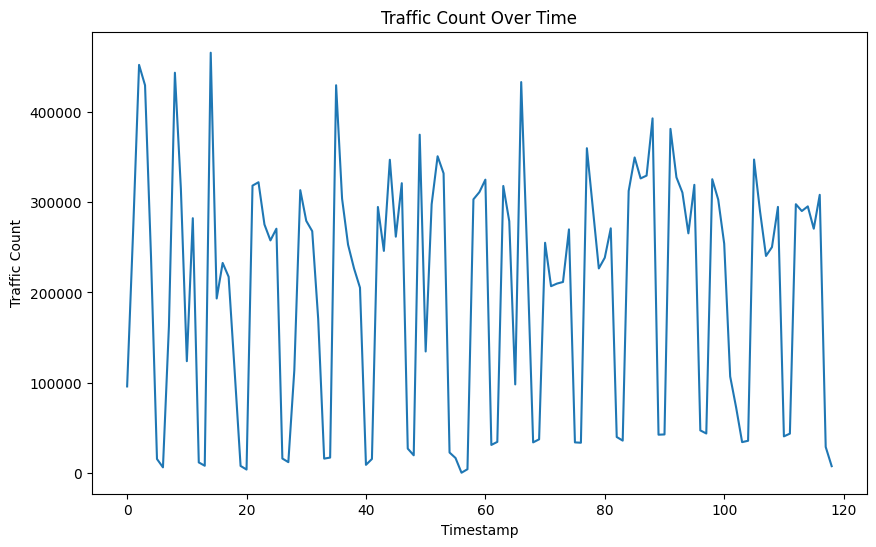

In [120]:
df = pd.read_csv('/content/drive/MyDrive/Netellixir/web_traffic.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df=df.reset_index()
df=df.groupby(pd.Grouper(key='Timestamp', freq='D')).sum().reset_index()
print(df.head())

plt.figure(figsize=(10, 6))
plt.plot(df['TrafficCount'])
plt.title('Traffic Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Traffic Count')
plt.show()


df['date'] = df['Timestamp'].apply(lambda x: x.toordinal())

scaler_traffic = MinMaxScaler()
df['scaled_traffic_count'] = scaler_traffic.fit_transform(df[['TrafficCount']])

scaler_date = StandardScaler()
df['scaled_date_ordinal'] = scaler_date.fit_transform(df[['date']])

def create_sequences(df, sequence_length):
    X_dates, X_traffic, y = [], [], []
    for i in range(len(df) - sequence_length):
        date_seq = df['scaled_date_ordinal'].values[i:i+sequence_length]
        traffic_seq = df['scaled_traffic_count'].values[i:i+sequence_length]
        X_dates.append(date_seq)
        X_traffic.append(traffic_seq)
        y.append(df['scaled_traffic_count'].values[i+sequence_length])
    return np.array(X_dates), np.array(X_traffic), np.array(y)


# Refference

FLAML documentation: https://microsoft.github.io/FLAML/docs/Examples/AutoML-Regression/

Scikit-learn documentation: https://scikit-learn.org/stable/user_guide.html